# Jyro Python Robot Simulator

## Pure-Python simulator for robots.

In [1]:
from jyro.simulator import (Pioneer, Simulator, Canvas,
                            PioneerFrontSonars, Gripper,
                            PioneerFrontLightSensors, Color)
import math

In [2]:
sim = Simulator()

In [3]:
sim.addBox(0, 0, 10, 10, wallcolor="white") # meters
sim.addBox(1, 1, 2, 2, wallcolor="purple")
sim.addBox(7, 7, 8, 8, wallcolor="purple")
## brightness of 1 is radius 1 meter
sim.addLight(7, 7, 4.25, color=Color(255, 255, 0, 64))

In [4]:
robot = Pioneer("Pioneer", 5.00, 5.00, math.pi / 2) # meters, radians
robot.addDevice(PioneerFrontSonars(maxRange=4.0))
robot.addDevice(Gripper())
robot.addDevice(PioneerFrontLightSensors())
sim.addRobot(robot)

In [27]:
from jyro.simulator.svgcanvas import SVGCanvas

canvas = SVGCanvas((250, 250))

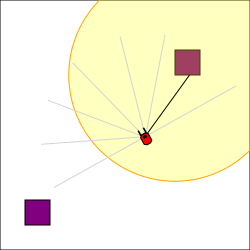

In [28]:
sim.draw(canvas)

In [29]:
sim["Pioneer"].getPose()

(5.846928811896772, 4.4439502249913545, 0.5088664970479622)

In [30]:
sim["Pioneer"].move(1, 1)

In [31]:
from IPython.display import display, clear_output

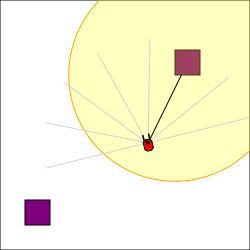

In [32]:
for i in range(500):
    sim.step()
    for r in sim.robots:
        r.updateDevices()
    sim.draw(canvas)
    clear_output(wait=True)
    display(canvas)

In [33]:
%%time

import numpy

light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

for i in range(500):
    sim.step()
    for r in sim.robots:
        r.updateDevices()
        light0[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[0]        
        light1[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[1]

CPU times: user 940 ms, sys: 0 ns, total: 940 ms
Wall time: 944 ms


It took about 1 second to simulate 50 seconds.

## Checking Light Readings

New simulated light sensors are 75% direct light and 25% ambient light.

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

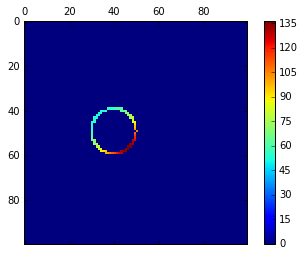

In [35]:
fig1 = plt.figure()
sp0 = fig1.add_subplot(111)
p0 = sp0.matshow(light0)
fig1.colorbar(p0)

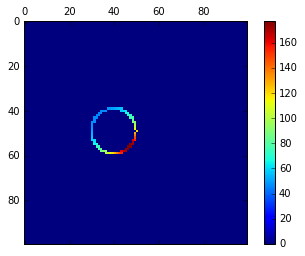

In [36]:
fig2 = plt.figure()
sp1 = fig2.add_subplot(111)
p1 = sp1.matshow(light1)
fig2.colorbar(p1)

## Differences between two light sensors

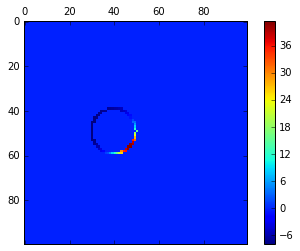

In [37]:
fig3 = plt.figure()
sp3 = fig3.add_subplot(111)
p3 = sp3.matshow(light1 - light0)
fig3.colorbar(p3)